In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,classification_report,confusion_matrix


file_path = "DATASET.xlsx"

xls = pd.ExcelFile(file_path)
print("✅ Available sheets:", xls.sheet_names)

# Read both sheets
sheet1_df = pd.read_excel(file_path, sheet_name="Sheet1", header=0)
sheet2_df = pd.read_excel(file_path, sheet_name="Sheet2", header=0)
sheet3_df = pd.read_excel(file_path, sheet_name="yearly_rainfall", header=0)

print(sheet1_df.head(10))    #displaying read sheet1,2,3
print(sheet1_df.tail(10))
print(sheet2_df.head(10))



✅ Available sheets: ['Sheet1', 'Sheet2', 'yearly_rainfall']
      Year       Period Months_Covered  Period_Length   District  No_of_HNS  \
0  2023-24  Pre-Monsoon        May–Aug              4     Bokaro         14   
1  2023-24  Pre-Monsoon        May–Aug              4     Chatra         11   
2  2023-24  Pre-Monsoon        May–Aug              4    Deoghar         10   
3  2023-24  Pre-Monsoon        May–Aug              4    Dhanbad         17   
4  2023-24  Pre-Monsoon        May–Aug              4      Dumka          8   
5  2023-24  Pre-Monsoon        May–Aug              4     Garhwa          8   
6  2023-24  Pre-Monsoon        May–Aug              4    Giridih         13   
7  2023-24  Pre-Monsoon        May–Aug              4      Godda         10   
8  2023-24  Pre-Monsoon        May–Aug              4      Gumla         18   
9  2023-24  Pre-Monsoon        May–Aug              4  Hazaribag         25   

   Rise_<2m  Rise_<2m_%  Rise_2-4m  Rise_2-4m_%  Rise_>4m  Rise_>4m_% 

In [16]:
print(sheet1_df.describe())  #describing df
print(sheet2_df.describe())
print(sheet3_df.describe())

       Period_Length  No_of_HNS   Rise_<2m  Rise_<2m_%  Rise_2-4m  \
count      71.000000  71.000000  71.000000   70.000000  71.000000   
mean        6.633803  14.450704   1.887324   11.944571   1.676056   
std         2.064942   9.804939   2.891116   13.066350   3.421673   
min         4.000000   5.000000   0.000000    0.000000   0.000000   
25%         4.000000   9.000000   0.000000    0.000000   0.000000   
50%         7.000000  11.000000   1.000000    8.010000   0.000000   
75%         9.000000  17.500000   2.500000   20.000000   2.000000   
max         9.000000  54.000000  19.000000   50.000000  23.000000   

       Rise_2-4m_%   Rise_>4m  Rise_>4m_%   Fall_<2m  Fall_<2m_%  Fall_2-4m  \
count    70.000000  71.000000   70.000000  71.000000   70.000000  71.000000   
mean     12.125000   2.154930   17.201429   3.450704   22.751143   3.436620   
std      18.306066   3.236611   24.048914   4.331904   22.345245   4.575501   
min       0.000000   0.000000    0.000000   0.000000    0.0000

In [17]:
sheet1_df=sheet1_df.drop_duplicates()  # deleting duplicates if any
sheet2_df=sheet2_df.drop_duplicates()
sheet3_df=sheet3_df.drop_duplicates()


In [18]:
print(sheet2_df.columns.tolist())     #list all columns of sheet2
sheet2_df["Date"]=pd.to_datetime(sheet2_df["Date"],errors="coerce")


['District', 'Date', 'Actual Rainfall (mm)', 'Normal Rainfall (mm)', 'Departure (mm)']


In [19]:
print(sheet1_df['District'].unique())  # to determine spelling mistake in district columns
print(sheet2_df['District'].unique())

correction={"Devghar":"Deoghar"}
sheet1_df['District']=sheet1_df['District'].replace(correction)



['Bokaro' 'Chatra' 'Deoghar' 'Dhanbad' 'Dumka' 'Garhwa' 'Giridih' 'Godda'
 'Gumla' 'Hazaribag' 'Jamtara' 'Khunti' 'Koderma' 'Latehar' 'Lohardaga'
 'Pakur' 'Palamau' 'Paschim Singbhum' 'Purba Singbhum' 'Ramgarh' 'Ranchi'
 'Sahebganj' 'Saraikela' 'Simdega' 'Sahibganj']
['Ranchi' 'Dhanbad' 'East Singhbhum' 'Bokaro' 'West Singhbhum' 'Chatra'
 'Deoghar' 'Dumka' 'Giridih' 'Godda' 'Gumla' 'Hazaribagh' 'Jamtara'
 'Khunti' 'Koderma' 'Latehar' 'Lohardaga' 'Pakur' 'Palamu' 'Ramgarh'
 'Sahibganj' 'Saraikela' 'Simdega' 'Garhwa']


In [20]:
#filling NAN value with mean,replacing negative with zero and rounding off value to 2 decimal point

def clean_df(df):

    for col in df.columns:               # for numeric data
        if df[col].dtype in ['int64','float64']:
            df[col]=pd.to_numeric(df[col],errors="coerce")
            df[col]=df[col].fillna(df[col].mean() if not df[col].isna().all() else 0)
            df.loc[df[col]<0,col]=0
            df[col]=df[col].round(2)
    return df


sheet1_cleaned = clean_df(sheet1_df.copy())      #passing sheet in clean() and storing it
sheet2_cleaned = clean_df(sheet2_df.copy())
sheet3_cleaned = sheet3_df.copy()


#  check category distributions.String/text data converted to numeric
# text to numeric using mapping

#sheet1
year_mapping={
    "2020-21":2021,
    "2021-22":2022,
    "2022-23":2023,
    "2023-24":2024
}

sheet1_cleaned["Year"]=sheet1_cleaned["Year"].map(year_mapping).fillna(sheet1_cleaned['Year'])

period_mapping={
    "Pre-Monsoon":0,
    "Monsoon":1,
    "Post-Monsoon":2
}

sheet1_cleaned["Period"]=sheet1_cleaned["Period"].map(period_mapping)

#month done through encode since range varies
from sklearn.preprocessing import LabelEncoder

encoder_months=LabelEncoder()
sheet1_cleaned["Months_Covered"]=encoder_months.fit_transform(sheet1_cleaned["Months_Covered"])


#sheet1 sheet2

combined_districts = pd.concat([
    sheet1_cleaned["District"],
    sheet2_cleaned["District"]
])

encoder = LabelEncoder()
encoder.fit(combined_districts)

# Now encode using the same encoder
sheet1_cleaned["District"] = encoder.transform(sheet1_cleaned["District"])
sheet2_cleaned["District"] = encoder.transform(sheet2_cleaned["District"])

sheet2_cleaned["Date"] = pd.to_datetime(sheet2_cleaned["Date"], errors="coerce")  #extracting year from date
sheet2_cleaned["Year"] = sheet2_cleaned["Date"].dt.year
sheet2_cleaned["Year"] = sheet2_cleaned["Year"].astype(int)


#sheet3
category_mapping={
     "SCANTY":0,
     "DEFICIENT":1,
     "NORMAL":2,
     "EXCESS":3
}
sheet3_cleaned["CATEGORY"]=sheet3_cleaned["CATEGORY"].map(category_mapping)

#year storing as numeric
sheet3_cleaned["YEAR"]=pd.to_numeric(sheet3_cleaned["YEAR"],errors="coerce").astype(int)


sheet3_cleaned=sheet3_cleaned.rename(columns={"ACTUAL (mm)":"Yearly_Actual_mm",
                                    "NORMAL (mm)":"Yearly_Normal_mm",
                                    "DEPARTURE (mm)":"Yearly_Departure_mm",
                                    "CATEGORY":"Yearly_Category"})

print(sheet2_cleaned.head(10))

   District       Date  Actual Rainfall (mm)  Normal Rainfall (mm)  \
0        23 2024-06-01                 342.1                   280   
1         3 2024-06-01                 310.5                   275   
2         5 2024-06-01                 365.2                   290   
3         0 2024-06-01                 298.7                   270   
4        28 2024-06-01                 370.4                   295   
5         1 2024-06-01                 285.6                   265   
6         2 2024-06-01                 295.3                   268   
7         4 2024-06-01                 312.7                   272   
8         7 2024-06-01                 301.9                   270   
9         8 2024-06-01                 280.4                   260   

   Departure (mm)  Year  
0            62.1  2024  
1            35.5  2024  
2            75.2  2024  
3            28.7  2024  
4            75.4  2024  
5            20.6  2024  
6            27.3  2024  
7            40.7  20

In [21]:
#feature eng columns are added

#  Sheet1 (Groundwater) 
#if totalrise and total fall exist then find net gw change

if "Total_Rise" in sheet1_cleaned and "Total_Fall" in sheet1_cleaned:
    sheet1_cleaned["Net_GW_Change"] = sheet1_cleaned["Total_Rise"] - sheet1_cleaned["Total_Fall"]

#  Sheet2 (Monthly Rainfall)
sheet2_cleaned["Rainfall_Anomaly"] = sheet2_cleaned["Actual Rainfall (mm)"] - sheet2_cleaned["Normal Rainfall (mm)"]
sheet2_cleaned["Rainfall_Ratio"] = sheet2_cleaned["Actual Rainfall (mm)"] / (sheet2_cleaned["Normal Rainfall (mm)"] + 1e-5)

#  Sheet3 
sheet3_cleaned = sheet3_cleaned.sort_values("YEAR")
sheet3_cleaned["Yearly_Anomaly"] = sheet3_cleaned["Yearly_Actual_mm"] - sheet3_cleaned["Yearly_Normal_mm"]
sheet3_cleaned["Yearly_Ratio"] = sheet3_cleaned["Yearly_Actual_mm"] / (sheet3_cleaned["Yearly_Normal_mm"] + 1e-5)
sheet3_cleaned["Prev_Year_Rainfall"] = sheet3_cleaned["Yearly_Actual_mm"].shift(1)
sheet3_cleaned["Rainfall_3yr_Avg"] = sheet3_cleaned["Yearly_Actual_mm"].rolling(3, min_periods=1).mean()


In [22]:
#merging sheet1 sheet2
# Ensure merge keys have the same type

sheet1_cleaned['District'] = sheet1_cleaned['District'].astype(str)
sheet2_cleaned['District'] = sheet2_cleaned['District'].astype(str)

sheet1_cleaned['Year'] = sheet1_cleaned['Year'].astype(int)
sheet2_cleaned['Year'] = sheet2_cleaned['Year'].astype(int)

# Identify all columns in sheet2 except the merge keys
cols_to_merge = [col for col in sheet2_cleaned.columns if col not in ['District', 'Year']]

# Merge the two sheets, keeping all rows from sheet1
merged_df = pd.merge(
    sheet1_cleaned,
    sheet2_cleaned[['District', 'Year'] + cols_to_merge],
    on=['District', 'Year'],
    how='inner'
)

print(merged_df.head(10))
# Save the merged dataframe
merged_df.to_excel("processed_data.xlsx", index=False)
print("✅ Merge complete. Saved as processed_data.xlsx")


   Year  Period  Months_Covered  Period_Length District  No_of_HNS  Rise_<2m  \
0  2024       0               0              4        0         14         4   
1  2024       0               0              4        0         14         4   
2  2024       0               0              4        1         11         5   
3  2024       0               0              4        1         11         5   
4  2024       0               0              4        2         10         4   
5  2024       0               0              4        2         10         4   
6  2024       0               0              4        3         17         6   
7  2024       0               0              4        3         17         6   
8  2024       0               0              4        4          8         1   
9  2024       0               0              4        4          8         1   

   Rise_<2m_%  Rise_2-4m  Rise_2-4m_%  ...  Fall_>4m_%  Total_Rise  \
0       28.57          4        28.57  ...       

In [23]:
output_file = "processed_data.xlsx"

# sheet3_cleaned appended at merged_data .saving sheet3_cleaned as sheet2
with pd.ExcelWriter(output_file, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    sheet3_cleaned.to_excel(writer, sheet_name="Sheet2", index=False)

print("✅ 'Sheet3_Cleaned' added to 'processed_data.xlsx'")


✅ 'Sheet3_Cleaned' added to 'processed_data.xlsx'


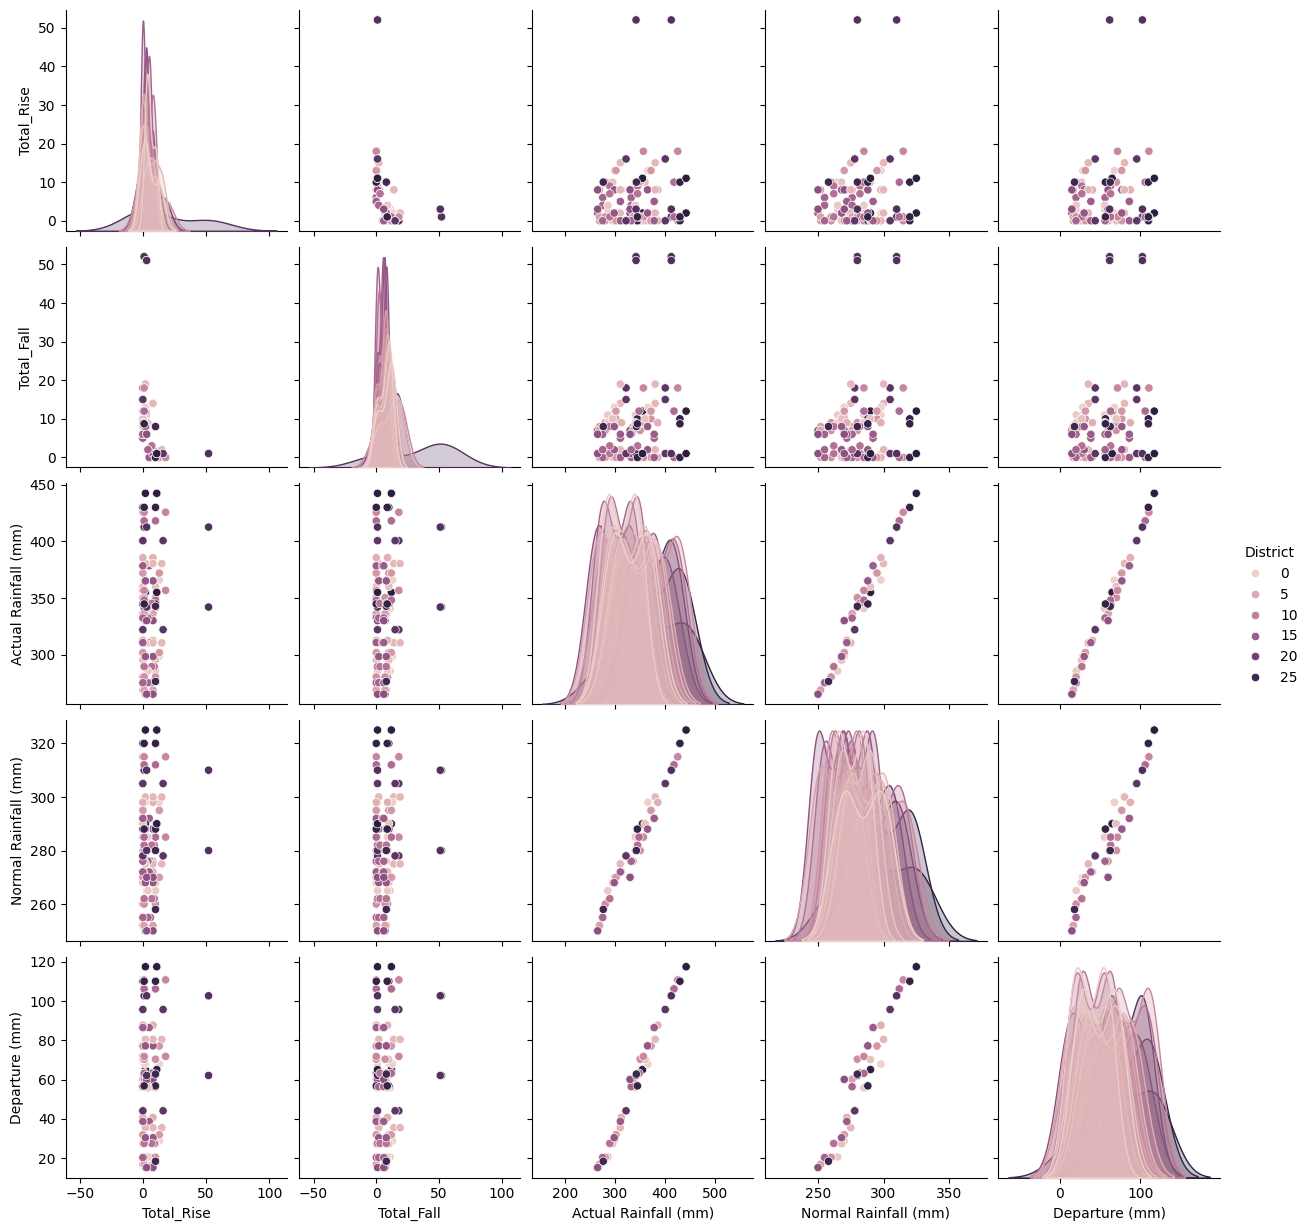

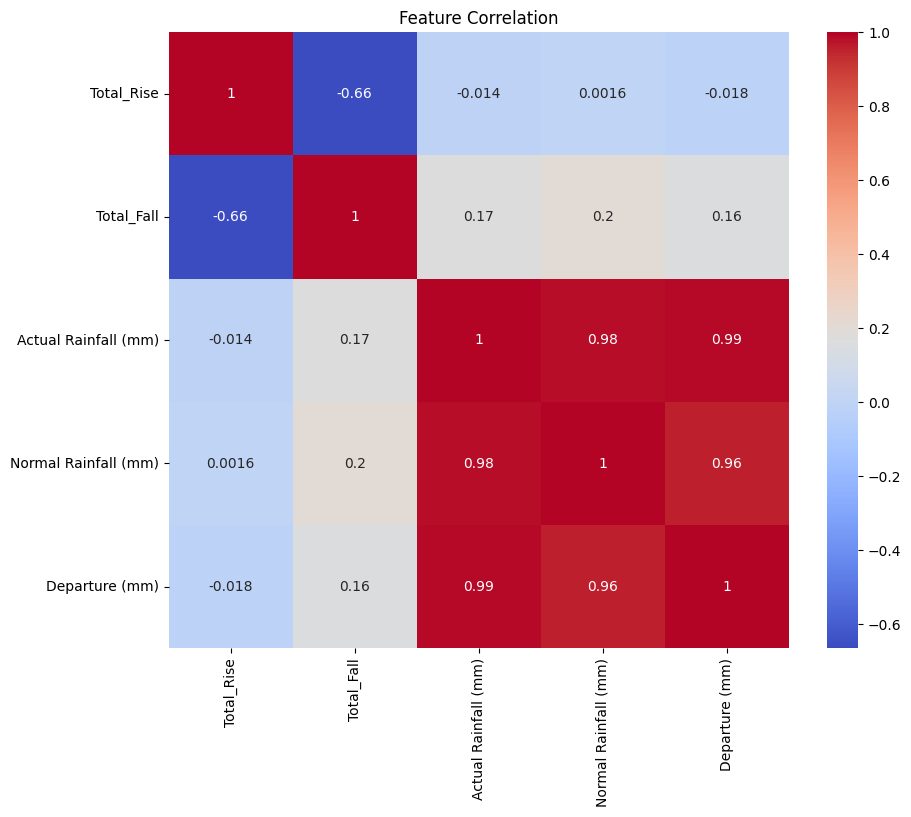

In [24]:
#pairplot and coorelation
# Load dataset
df = pd.read_excel("processed_data.xlsx", sheet_name="Sheet1")

numeric_cols = ['Total_Rise','Total_Fall','Actual Rainfall (mm)','Normal Rainfall (mm)','Departure (mm)']

#pairplot
sns.pairplot(df[numeric_cols+['District']],hue='District')   #each district different color
plt.show()

#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(method="spearman"),annot=True,cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


===== Regression Metrics =====
Mean Squared Error: 4.238416183574879
Root Mean Squared Error: 2.0587414076505284
R2 Score: 0.7331442321933931


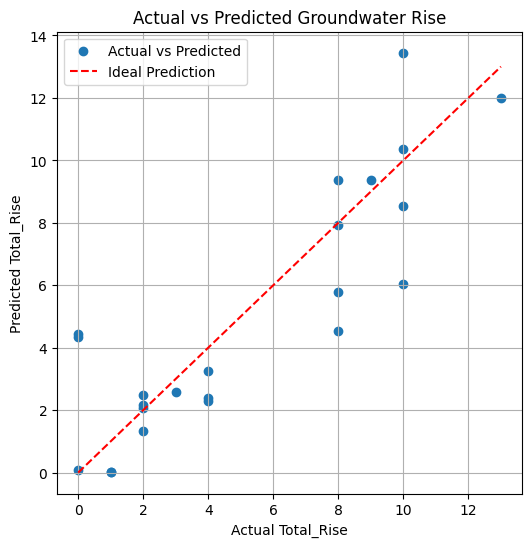

Confusion Matrix:
 [[ 3  2]
 [ 1 17]]


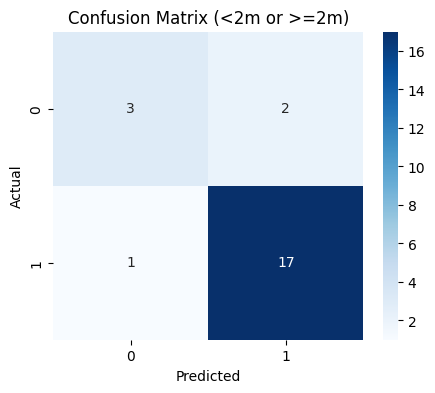

In [25]:
#confusion matrix plotting and actual vs predicted 

# Ensure merged_df is sorted
merged_df = merged_df.sort_values(['District', 'Year'])

# Previous period totals
merged_df['Prev_Total_Rise'] = merged_df.groupby('District')['Total_Rise'].shift(1)
merged_df['Prev_Total_Fall'] = merged_df.groupby('District')['Total_Fall'].shift(1)
merged_df['Prev_Net_GW_Change'] = merged_df['Prev_Total_Rise'] - merged_df['Prev_Total_Fall']

# Previous period breakdowns by depth (you already have these)
merged_df['Prev_Rise_<2m'] = merged_df.groupby('District')['Rise_<2m'].shift(1)
merged_df['Prev_Rise_2-4m'] = merged_df.groupby('District')['Rise_2-4m'].shift(1)
merged_df['Prev_Rise_>4m'] = merged_df.groupby('District')['Rise_>4m'].shift(1)

merged_df['Prev_Fall_<2m'] = merged_df.groupby('District')['Fall_<2m'].shift(1)
merged_df['Prev_Fall_2-4m'] = merged_df.groupby('District')['Fall_2-4m'].shift(1)
merged_df['Prev_Fall_>4m'] = merged_df.groupby('District')['Fall_>4m'].shift(1)


X_cols = [
     'Actual Rainfall (mm)', 'Normal Rainfall (mm)', 'Departure (mm)',
     'Prev_Total_Rise', 'Prev_Total_Fall','Prev_Net_GW_Change',
    'Prev_Rise_<2m', 'Prev_Rise_2-4m', 'Prev_Rise_>4m','Rainfall_Anomaly','Rainfall_Ratio',
    'Prev_Fall_<2m', 'Prev_Fall_2-4m', 'Prev_Fall_>4m','No_of_HNS','Year'
]

X = merged_df[X_cols]
y = merged_df['Total_Rise']    # you do this for total_fall too for total_fall r2=0.76


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Fit Random Forest Regressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

#  Predict
y_pred =rf.predict(X_test_scaled)

# Evaluate Regression

print("===== Regression Metrics =====")
#print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
#print("R2 Score:", r2_score(y_test, y_pred))

from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred are already defined
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)


plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred,label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--',label='Ideal Prediction')
plt.xlabel("Actual Total_Rise")
plt.ylabel("Predicted Total_Rise")
plt.title("Actual vs Predicted Groundwater Rise")
plt.legend()
plt.grid(True)
plt.show()

#binary classification my rise is continous in data
# Step 8: Binary Classification (<2m or >=2m)
y_test_class = (y_test >= 2).astype(int)       # actual class: rise=> then positive and rise<2 negative
y_pred_class = (y_pred >= 2).astype(int)        #predicted class

cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:\n", cm)

# Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (<2m or >=2m)")
plt.show()



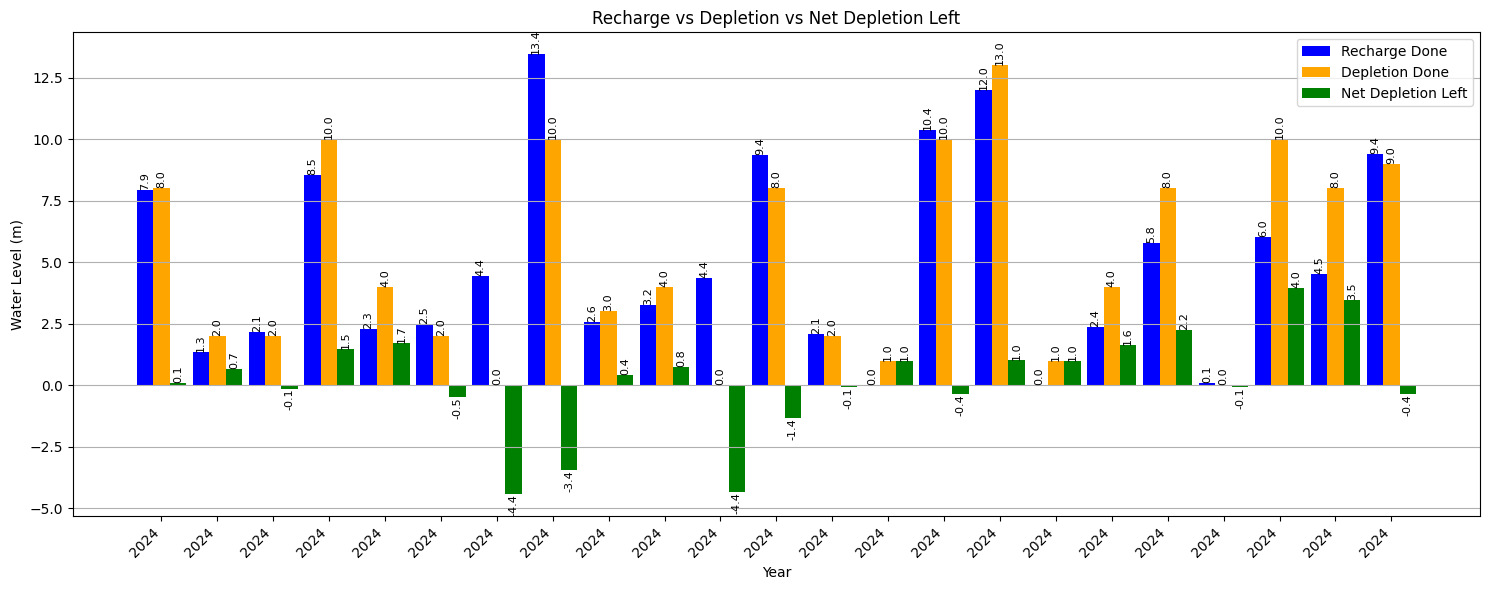

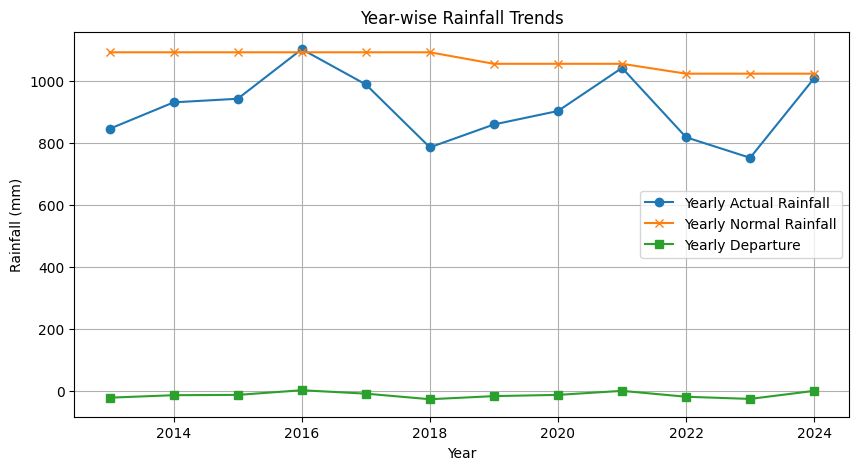

In [26]:
#recharge vs depletion plot vs net depletion
# # Compute Net Depletion Left
#total fall=depletion done,recharge done potted as Predicted_Recharge,net depletion=total fall-predicted recharge.
# #current groundwater=y_pred
df_test = X_test.copy()   # Xtest from train-split

df_test['Predicted_Recharge'] = y_pred
df_test['Total_Fall'] = y_test.values  # observed depletion
df_test['Net_Depletion_Left'] = df_test['Total_Fall'] - df_test['Predicted_Recharge']

# Plots
# 1. Recharge (predicted) vs Depletion (observed)
bar_width = 0.25
group_width = 3 * bar_width + 0.1
index = np.arange(len(df_test)) * group_width   # spacing between groups

plt.figure(figsize=(15,6))
colors = ['blue', 'orange', 'green']  

# Plot bars
bars1 = plt.bar(index, df_test['Predicted_Recharge'], bar_width,
                label='Recharge Done', color=colors[0])
bars2 = plt.bar(index + bar_width, df_test['Total_Fall'], bar_width,
                label='Depletion Done', color=colors[1])
bars3 = plt.bar(index + 2*bar_width, df_test['Net_Depletion_Left'], bar_width,
                label='Net Depletion Left', color=colors[2])

# Labels & title
plt.xlabel("Year")
plt.ylabel("Water Level (m)")
plt.title("Recharge vs Depletion vs Net Depletion Left")

# ✅ Use Year on x-axis
plt.xticks(index + bar_width, df_test['Year'], rotation=45, ha='right')

# Grid, legend, layout
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

# Add numbers on top of bars
for bars in [bars1, bars2, bars3]:
    plt.bar_label(bars, fmt='%.1f', fontsize=8, rotation=90)

plt.show()

# 2. Year-wise rainfall from Sheet2
df_yearly = pd.read_excel("processed_data.xlsx", sheet_name="Sheet2")
plt.figure(figsize=(10,5))
plt.plot(df_yearly['YEAR'], df_yearly['Yearly_Actual_mm'], marker='o', label='Yearly Actual Rainfall')
plt.plot(df_yearly['YEAR'], df_yearly['Yearly_Normal_mm'], marker='x', label='Yearly Normal Rainfall')
plt.plot(df_yearly['YEAR'], df_yearly['Yearly_Departure_mm'], marker='s', label='Yearly Departure')
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Year-wise Rainfall Trends")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
features = X_cols.copy()  #you can district too
target = 'Net_GW_Change'  


#  Risk Classification

def classify_risk(pred_value):
    if pred_value >= 4:
        return "Safe ✅"
    elif 2 <= pred_value < 4:
        return "Moderate ⚠️"
    else:
        return "Critical ❌"


# District-wise multi-step prediction

def predict_districtwise(df, model, scaler, months_ahead=4):
    results = []

    for district in df['District'].unique():
        district_data = df[df['District'] == district].copy()

        # Take last available record as baseline (1-row DataFrame)
        last_row = district_data[features].iloc[[-1]].copy()

        for step in range(months_ahead):
            # Scale input
            scaled_input = scaler.transform(last_row)

            # Predict net change
            pred_net_change = model.predict(scaled_input)[0]

            # Classify risk
            risk = classify_risk(pred_net_change)

            # Save results
            results.append({
                "District": district,
                "Step": step + 1,
                "Predicted_Net_Change": round(pred_net_change, 2),
                "Risk_Level": risk
            })

            # Update input for next step (simple trend simulation)
            last_row = last_row.copy()
            last_row['Actual Rainfall (mm)'] *= 0.98
            last_row['Normal Rainfall (mm)'] *= 1.0
            last_row['Departure (mm)'] = last_row['Actual Rainfall (mm)'] - last_row['Normal Rainfall (mm)']
            
    return pd.DataFrame(results)


# 4. Train Random Forest Model

X = merged_df[features]
y = merged_df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_scaled, y)

import joblib
# Save model and scaler
joblib.dump(rf, "groundwater_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# 5. Run district-wise predictions

districtwise_results = predict_districtwise(merged_df, rf, scaler, months_ahead=4)

print("✅ District-wise Forecast (first rows):")
print(districtwise_results.head(15))


✅ District-wise Forecast (first rows):
   District  Step  Predicted_Net_Change  Risk_Level
0         0     1                -11.17  Critical ❌
1         0     2                -11.17  Critical ❌
2         0     3                -11.17  Critical ❌
3         0     4                -11.20  Critical ❌
4         1     1                 -5.15  Critical ❌
5         1     2                 -5.21  Critical ❌
6         1     3                 -5.28  Critical ❌
7         1     4                 -5.39  Critical ❌
8        12     1                 -6.93  Critical ❌
9        12     2                 -6.91  Critical ❌
10       12     3                 -6.81  Critical ❌
11       12     4                 -6.77  Critical ❌
12       13     1                -10.62  Critical ❌
13       13     2                -10.62  Critical ❌
14       13     3                -10.62  Critical ❌


In [28]:
import joblib
joblib.dump(rf,"groundwater_model.pkl")
joblib.dump(scaler,'scaler.pkl')

rf_loaded=joblib.load("groundwater_model.pkl")
scaler_loaded=joblib.load("scaler.pkl")

print('Saved')

Saved
